# Introduction

Nested cross-validation is a technique used to estimate the generalization error of a model and its hyperparameters. It is especially useful when choosing between different models or when hyperparameters need to be optimized. In this tutorial, we will compare non-nested and nested cross-validation on a support vector classifier model using the iris dataset. We will also visualize the difference in performance between the two methods.

# Load the Dataset

The first step is to load the iris dataset from scikit-learn.

In [1]:
from sklearn.datasets import load_iris

# Load the dataset
iris = load_iris()
X_iris = iris.data
y_iris = iris.target

# Define the Hyperparameters

Next, we define the hyperparameters to be optimized for the support vector classifier. In this case, we optimize the cost parameter **C** and the kernel coefficient **gamma**.

In [2]:
# Set up possible values of parameters to optimize over
p_grid = {'C':[1, 10, 100], 'gamma':[0.01, 0.1]}

# Define the Model

We use a support vector classifier with a radial basis function kernel.

In [3]:
from sklearn.svm import SVC

# We will use a Support Vector Classifier with 'rbf' kernel
svm = SVC(kernel='rbf')

# Non-Nested Cross-Validation

We use non-nested cross-validation to tune the hyperparameters and evaluate the performance of the model. The **GridSearchCV** function performs an exhaustive search over specified parameter values for an estimator. We use a 4-fold cross-validation.

In [4]:
from sklearn.model_selection import GridSearchCV

# Non nested parameter search and scoring
clf = GridSearchCV(svm, param_grid=p_grid, cv=4)
clf.fit(X_iris, y_iris)
non_nested_score = clf.best_score_

# Nested Cross-Validation

We use nested cross-validation to estimate the generalization error of the model and its hyperparameters. In the inner loop, we perform a grid search to find the best hyperparameters for each training set. In the outer loop, we evaluate the performance of the model on the test set.

In [5]:
from sklearn.model_selection import KFold, cross_val_score
import numpy as np
# number of random trials
NUM_TRIALS = 30

# Arrays to store scores
non_nested_scores = np.zeros(NUM_TRIALS)
nested_scores = np.zeros(NUM_TRIALS)

# Loop for each trial
for i in range(NUM_TRIALS):
    # Choose cross-validation techniques for the inner and outer loops,
    # independetly of the dataset.
    inner_cv = KFold(n_splits=4, shuffle=True, random_state=i)
    outer_cv = KFold(n_splits=4, shuffle=True, random_state=i)

    # Nested CV with parameter optimization
    clf = GridSearchCV(svm, param_grid=p_grid, cv=inner_cv)
    nested_score = cross_val_score(clf, X=X_iris, y=y_iris, cv=outer_cv)
    nested_scores[i] = nested_score.mean()

score_difference = non_nested_scores - nested_scores.mean()

# Visualize the Results

We visualize the results of the non-nested and nested cross-validation using a bar chart.

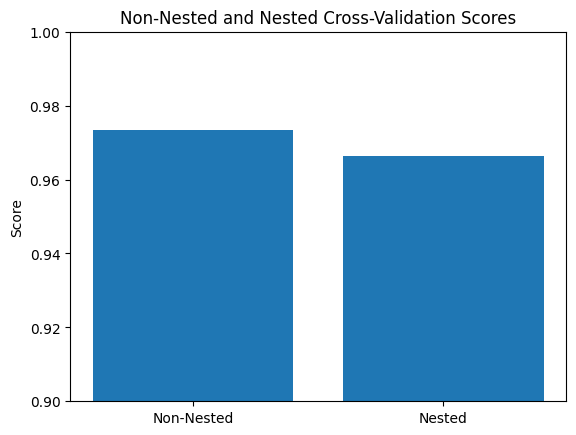

In [6]:
from matplotlib import pyplot as plt

# Plot bar chart of the difference.
plt.bar(["Non-Nested", "Nested"], [non_nested_score, nested_scores.mean()])
plt.ylim([0.9, 1.0])
plt.ylabel("Score")
plt.title("Non-Nested and Nested Cross-Validation Scores")
plt.show()

# Summary

Nested cross-validation is a powerful technique to estimate the generalization error of a model and its hyperparameters. It can help prevent overfitting and ensure that the model performs well on new data. In this tutorial, we compared non-nested and nested cross-validation on a support vector classifier model using the iris dataset. We visualized the difference in performance between the two methods using a bar chart.